##### Задаем вычисления на GPU(нету GPU)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7807895600286284644
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12424312934351721246
physical_device_desc: "device: XLA_CPU device"
]


##### Загрузка данных

In [1]:
from skimage.io import imread
import skimage
import glob
from os.path import join
import numpy as np

def input_in_array(train_gt, train_img_dir, img_size):
    X_data = []
    y_data = []
    files = glob.glob(join(train_img_dir, '*.jpg'))
    print(join(train_img_dir, '*.jpg'))
    
    for name in files:
        i = name[-9:len(name)]
        img = imread(name).astype('float64')    
        X_data.append(skimage.transform.resize(img, (img_size, img_size)))
        y_data.append(np.array(train_gt[i]))
        #преобразования
        show_points()
        y_data[::2] *= img_size / img.shape[1]
        y_data[1::2] *= img_size / img.shape[0]
        
    

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

input_in_array(train_gt, './mini_test', 39)

##### Augamintation 

In [2]:
def show_points(image, face_points):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 10))
    plt.imshow(image)
    plt.axis('off')
    for i, x in enumerate(range(0, face_points.size, 2)):
        plt.scatter(face_points[x], face_points[x + 1], s=256,
                    marker='$' + str(i) + '$', edgecolors='face', color='r')
    plt.show()

In [7]:
%matplotlib inline
import skimage
from skimage.io import imshow, imread

in_img = imread('./mini_test/00000.jpg')

# face_points = face_points.astype('float64')
# face_points[::2] *= (32 / img.shape[0])
# face_points[1::2] *= (32 / img.shape[1])


In [ ]:
face_points = np.array([51,51,127,60,169,65,203,52,68,77,85,75,110,82,160,87,171,79,193,84,156,144,92,174,140,180,168,179])
#show_points(img, face_points)

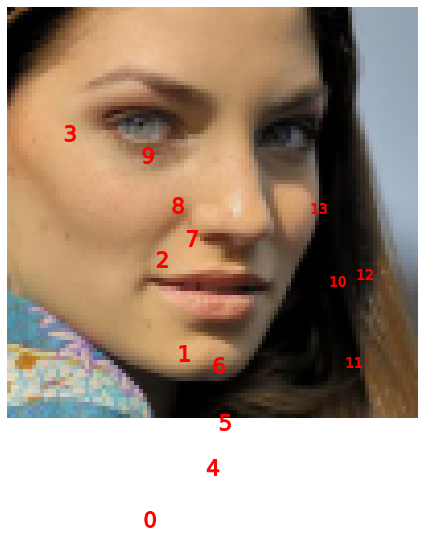

In [8]:
#img1 = img.copy()
#img1[:,:,1] = 0.5 * img[:,:,1]
#show_points(in_img, face_points)
face_points = np.array([89,325,111,219,97,159,38,79,129,292,137,263,133,227,116,146,107,125,88,93,209,173,219,225,226,169,197,127])
#show_points(img, face_points)

img_size = 100

img = skimage.transform.resize(in_img, (img_size, img_size, 3))
face_points = face_points.astype('float64')
face_points[::2] *= (img_size / in_img.shape[1])
face_points[1::2] *= (img_size / in_img.shape[0])

show_points(img, face_points)

In [ ]:
def rotate(img, face_points, angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = (np.array(((c,-s), (s, c)))).astype('float64')
    img1 = skimage.transform.rotate(img, angle).astype('float64')
    new_face_points = face_points.astype('float64')
    
    d_y, d_x, _ = img1.shape
    d_y /= 2
    d_x /= 2
    
    new_face_points[::2] -= d_y
    new_face_points[1::2] -= d_x
    
    for i, x in enumerate(range(0, new_face_points.size, 2)):
        new_face_points[x:x+2] = np.dot(new_face_points[x:x+2], R)
        
    new_face_points[::2] += d_y
    new_face_points[1::2] += d_x
        
    show_points(img1, new_face_points)
    #return (img1, face_points)

In [ ]:
rotate(img, face_points, 14)

In [ ]:
def mirror(img, face_points):
    d_y, d_x, _ = img.shape
    d_y /= 2
    d_x /= 2
    new_face_points = face_points.astype('float64')
    new_face_points[::2] -= d_y
    new_face_points[::2] *= -1
    new_face_points[::2] += d_y
    img1 = img[:, ::-1]
    
    new_face_points[0], new_face_points[6] = new_face_points[6], new_face_points[0]
    new_face_points[1], new_face_points[7] = new_face_points[7], new_face_points[1]
    
    new_face_points[18], new_face_points[8] = new_face_points[8], new_face_points[18]
    new_face_points[19], new_face_points[9] = new_face_points[9], new_face_points[19]
    
    new_face_points[10], new_face_points[16] = new_face_points[16], new_face_points[10]
    new_face_points[11], new_face_points[17] = new_face_points[17], new_face_points[11]
    
    new_face_points[2], new_face_points[4] = new_face_points[4], new_face_points[2]
    new_face_points[3], new_face_points[5] = new_face_points[5], new_face_points[3]
    
    new_face_points[12], new_face_points[14] = new_face_points[14], new_face_points[12]
    new_face_points[13], new_face_points[15] = new_face_points[15], new_face_points[13]
    
    new_face_points[22], new_face_points[26] = new_face_points[26], new_face_points[22]
    new_face_points[23], new_face_points[27] = new_face_points[27], new_face_points[23]
    
    
    
    show_points(img1, new_face_points)

In [ ]:
mirror(img, face_points)

In [11]:
from tensorflow.keras.models import load_model
from skimage.io import imread, imshow
import skimage
import numpy as np

In [12]:
model = load_model('my_model1.hdf5')

In [ ]:
%matplotlib inline
kek = imread('mini_test/00001.jpg')
kek = skimage.transform.resize(kek, (100, 100, 3))
imshow(kek)

In [ ]:
d_input = np.zeros((1, 100, 100, 3), dtype='float64')
d_input[0] = kek.astype('float64')
out = model.predict(d_input)

In [ ]:
print(out.shape)
show_points(kek, out[0])

(1, 28)


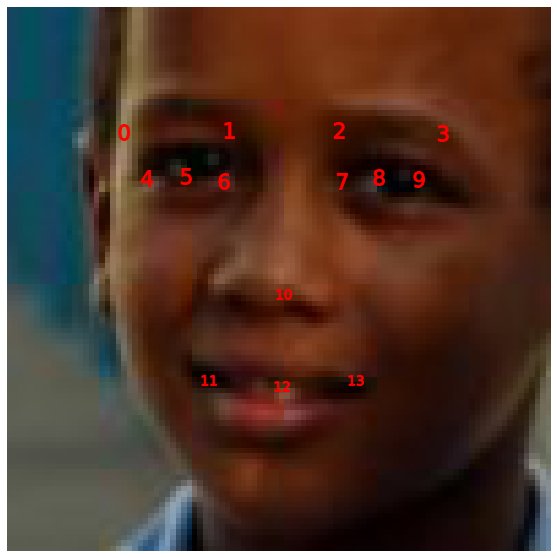

In [15]:
kek = imread('mini_test/00001.jpg')
kek = skimage.transform.resize(kek, (100, 100, 3))
#imshow(kek)
d_input = np.zeros((1, 100, 100, 3), dtype='float64')
d_input[0] = kek.astype('float64')
out = model.predict(d_input)
print(out.shape)
show_points(kek, out[0])